In [171]:
#...........................Importing required libraries.............................
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import altair as alt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [172]:
#..............................Importing dataset to be displayed in full context (columns)........................

data = pd.read_csv('HR_DATA.csv')
pd.set_option('display.max_columns',None)
print(f"Dataset Rows: {data.shape[0]}\nDataset Cols: {data.shape[1]}")
data.head()


Dataset Rows: 1470
Dataset Cols: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,1,0,13,3,3,80,0,23,5,3,20,18,15,15
1,52,0,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,1,0,14,3,1,80,1,34,5,3,33,18,11,9
2,42,0,Travel_Rarely,532,Research & Development,4,2,Technical Degree,1,319,3,Male,58,3,5,Manager,4,Married,19232,4933,1,1,0,11,3,4,80,0,22,3,3,22,17,11,15
3,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,1,0,19,3,2,80,2,26,2,4,20,17,5,6
4,46,0,Travel_Rarely,1319,Sales,3,3,Technical Degree,1,1863,1,Female,45,4,4,Sales Executive,1,Divorced,13225,7739,2,1,0,12,3,4,80,1,25,5,3,19,17,2,8


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [174]:
data.value_counts()

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   0          Non-Travel      287        Research & Development  5                 2          Life Sciences     1              1012            2                        Male    73          3               1         Research Scientist     4                Single         1051           13493        1                   1       0         15                 3                  4                         80             0        

In [175]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [176]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                       int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [177]:
#.........................displaying categorical datasets and nuumerical datasets differently for easy identification.............

cat = data.select_dtypes(include = ['category', 'object'])
num = data.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Single
1,Travel_Rarely,Research & Development,Life Sciences,Male,Manager,Married
2,Travel_Rarely,Research & Development,Technical Degree,Male,Manager,Married
3,Travel_Rarely,Research & Development,Medical,Female,Research Director,Married
4,Travel_Rarely,Sales,Technical Degree,Female,Sales Executive,Divorced


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,684,6,3,1,162,1,51,3,5,3,19537,6462,7,1,0,13,3,3,80,0,23,5,3,20,18,15,15
1,52,0,699,1,4,1,259,3,65,2,5,3,19999,5678,0,1,0,14,3,1,80,1,34,5,3,33,18,11,9
2,42,0,532,4,2,1,319,3,58,3,5,4,19232,4933,1,1,0,11,3,4,80,0,22,3,3,22,17,11,15
3,47,0,359,2,4,1,1443,1,82,3,4,3,17169,26703,3,1,0,19,3,2,80,2,26,2,4,20,17,5,6
4,46,0,1319,3,3,1,1863,1,45,4,4,1,13225,7739,2,1,0,12,3,4,80,1,25,5,3,19,17,2,8


In [178]:
#.........................displaying stastistical analysis of the dataset.........................
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [118]:
# .........................dropping unnecessary features........................

data.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [107]:
# %pip install pandas pandas-profiling
# import pandas_profiling as pp
# ppr = pp.ProfileReport(data, title='Pandas Profiling Report')
# ppr

In [180]:
# ..........................How is attrition dependent on Age?..........................

age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Attrition=0<br>Age=%{x}<br>Counts=%{y}<extra></extra>',
              'legendgroup': '0',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                          54, 55, 56, 57, 58, 59, 60], dtype=int64),
              'xaxis': 'x',
              'y': array([ 4,  3,  5,  7, 11, 10, 19, 20, 27, 45, 34, 50, 51, 51, 50, 46, 68, 68,
                          63, 44, 56, 36, 52, 34, 44, 30, 27, 39, 29, 21, 17, 22, 25, 17, 15, 17,
                          18, 19, 11,  4,  9, 10,  5], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'Attrition=1<br>Age=%{x}<br>Counts=%{y}<extra></extra>',
              'legendgroup': '1',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                          55, 56, 58], dtype=int64),
              'xaxis': 'x',
              'y': array([ 4,  6,  6,  6,  5,  4,  7,  6, 12,  3, 14, 18,  9, 18, 11, 12,  9, 10,
                           6,  6,  2,  6,  5,  6,  2,  2,  6,  2,  4,  3,  2,  2,  5,  2,  3,  2,
                           3,  3,  5], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'Attrition'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Agewise Counts of People in an Organization'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Age'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Counts'}}}
})

Observation

 As seen in the chart above, the attrition is maximum between the age groups 28-33. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

In [ ]:
corr = data.corr(numeric_only=True).abs()
corr.style.background_gradient(cmap='coolwarm')

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.010661,0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.056652,0.077924,0.031373,0.103369,0.006846,0.130016,0.169105,0.103481,0.159840,0.015170,0.043494,0.246118,0.013478,0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
DailyRate,0.010661,0.056652,1.000000,0.004985,0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
DistanceFromHome,0.001686,0.077924,0.004985,1.000000,0.021042,0.016075,0.031131,0.008783,0.005303,0.003669,0.017014,0.027473,0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.016806,0.021042,1.000000,0.027128,0.016775,0.042438,0.101589,0.011296,0.094961,0.026084,0.126317,0.020322,0.011111,0.024539,0.009118,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.103369,0.018355,0.016075,0.027128,1.000000,0.049857,0.008278,0.001212,0.006784,0.006259,0.037600,0.012594,0.070132,0.031701,0.029548,0.007665,0.003432,0.002693,0.019359,0.027627,0.001458,0.018007,0.016194,0.004999
HourlyRate,0.024287,0.006846,0.023381,0.031131,0.016775,0.049857,1.000000,0.042861,0.027853,0.071335,0.015794,0.015297,0.022157,0.007782,0.009062,0.002172,0.001330,0.050263,0.002334,0.008548,0.004607,0.019582,0.024106,0.026716,0.020123
JobInvolvement,0.029820,0.130016,0.046135,0.008783,0.042438,0.008278,0.042861,1.000000,0.012630,0.021476,0.015271,0.016322,0.015012,0.003507,0.017205,0.029071,0.034297,0.021523,0.005533,0.015338,0.014617,0.021355,0.008717,0.024184,0.025976
JobLevel,0.509604,0.169105,0.002966,0.005303,0.101589,0.001212,0.027853,0.012630,1.000000,0.001944,0.950300,0.039563,0.142501,0.000544,0.034730,0.021222,0.021642,0.013984,0.782208,0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,0.004892,0.103481,0.030571,0.003669,0.011296,0.006784,0.071335,0.021476,0.001944,1.000000,0.007157,0.000644,0.055699,0.024539,0.020002,0.002297,0.012454,0.010690,0.020185,0.005779,0.019459,0.003803,0.002305,0.018214,0.027656


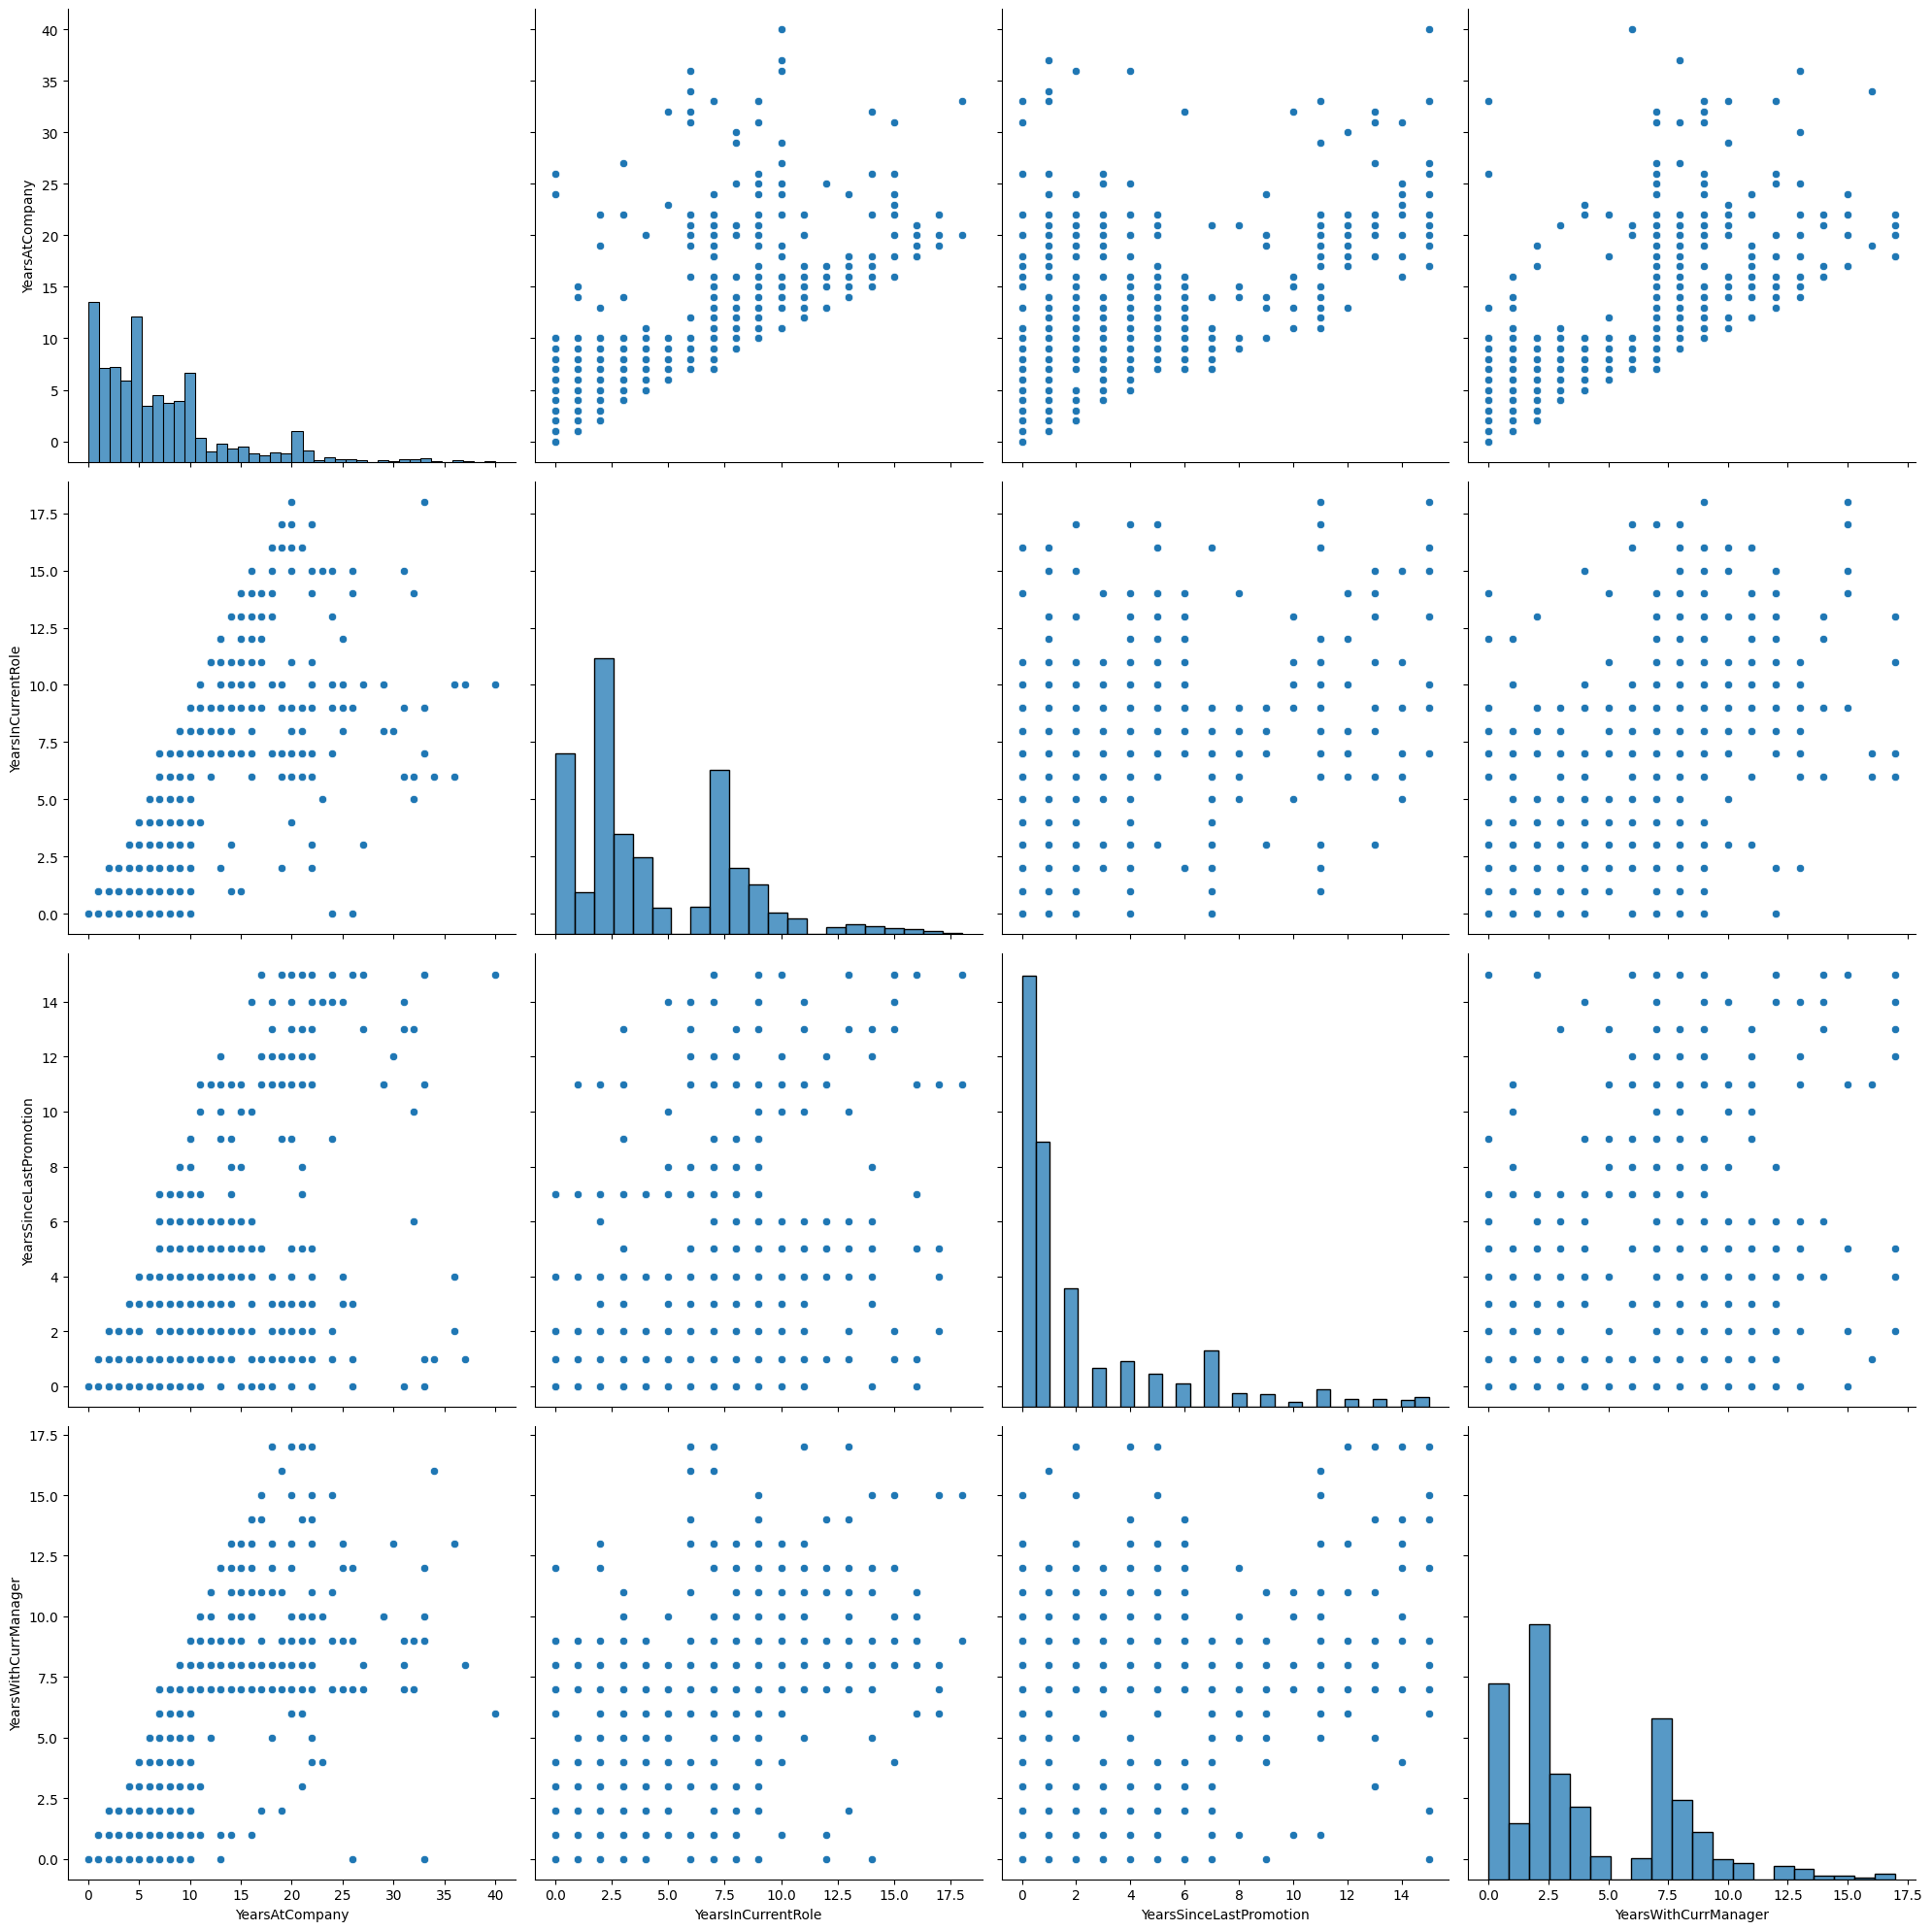

In [ ]:
cols=['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
sns.pairplot(data[cols],height=5)
plt.tight_layout()
plt.show()

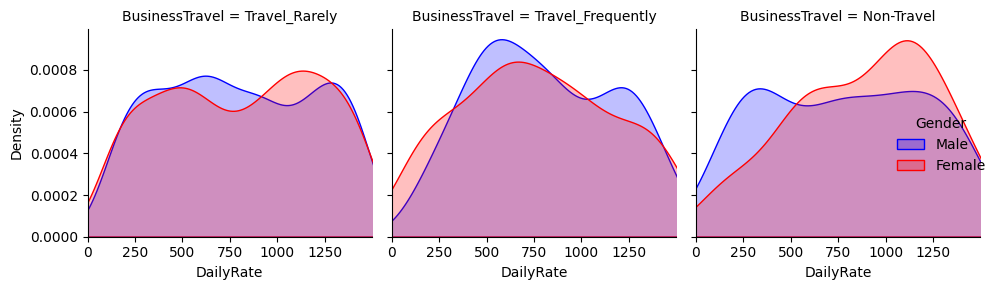

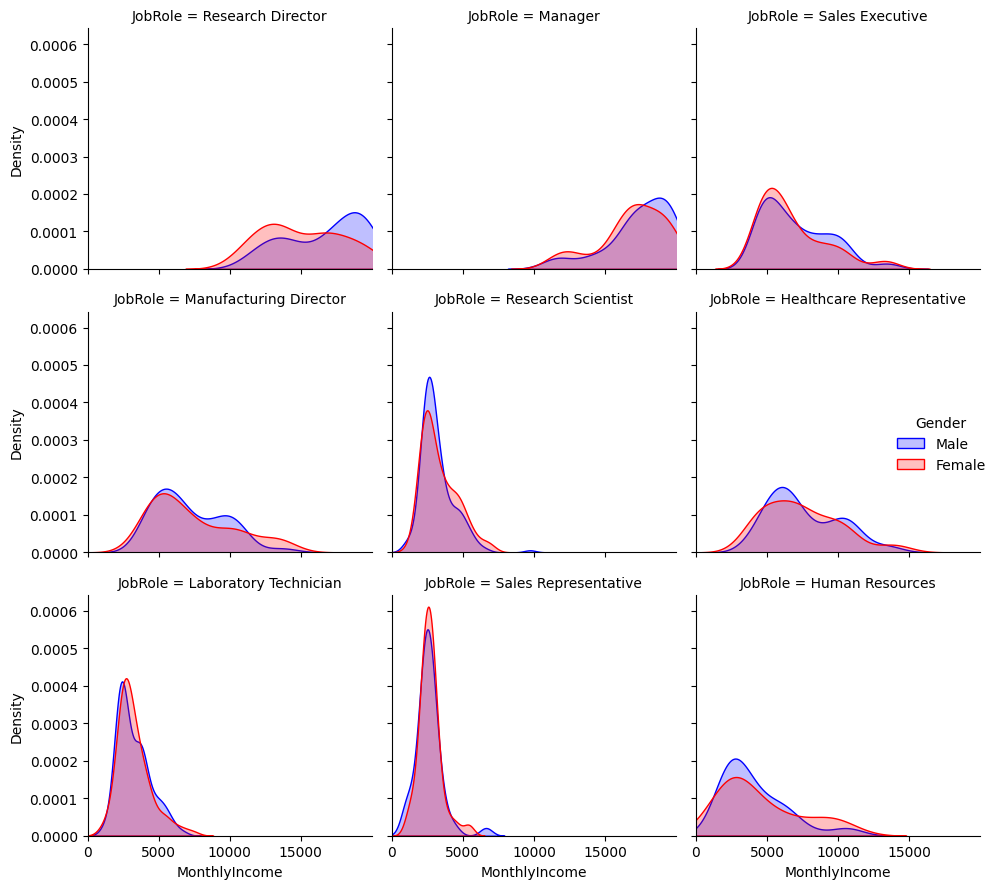

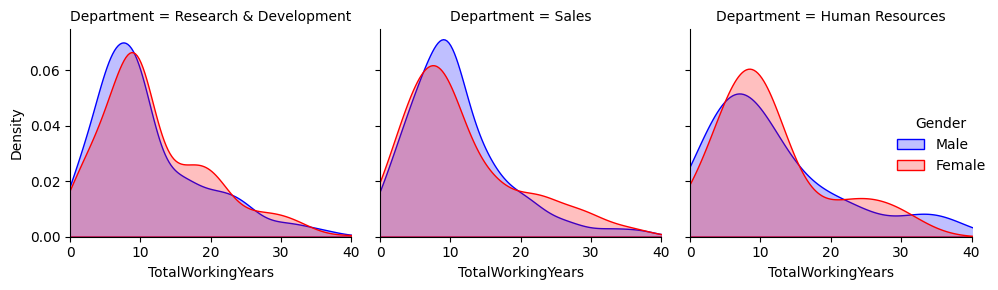

In [ ]:
def make_FacetGrid(data,col_name,x_value,hue='Gender'):
    facet=sns.FacetGrid(data=data,col=col_name,hue=hue,aspect=1,palette=['b','r'],col_wrap=3)
    facet.map(sns.kdeplot,x_value,fill=True)
    facet.set(xlim=[0,data[x_value].max()])
    facet.add_legend(label_order=data[hue].unique())
    plt.tight_layout()
col_names=['BusinessTravel','JobRole','Department']
x_values=['DailyRate','MonthlyIncome','TotalWorkingYears']

for i in range(len(col_names)):
    make_FacetGrid(data,col_names[i],x_values[i])
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

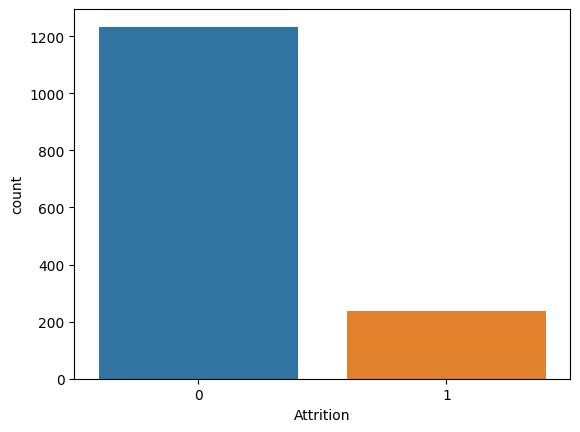

In [ ]:
sns.countplot(x='Attrition', data=data)

In [119]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
        lowerQuartile = dataframe[i].describe()[4]
        upperQuartile = dataframe[i].describe()[6]
        IQR = upperQuartile - lowerQuartile
        lowerIQR = lowerQuartile- 1.5 * IQR
        upperIQR = upperQuartile + 1.5 * IQR
        dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,0,13,3,3,0,23,5,3,20,18,15,15
1,52,0,Travel_Rarely,699,Research & Development,1,4,Life Sciences,3,Male,65,2,5,Manager,3,Married,19999,5678,0,0,14,3,1,1,34,5,3,33,18,11,9
2,42,0,Travel_Rarely,532,Research & Development,4,2,Technical Degree,3,Male,58,3,5,Manager,4,Married,19232,4933,1,0,11,3,4,0,22,3,3,22,17,11,15
3,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,0,19,3,2,2,26,2,4,20,17,5,6
4,46,0,Travel_Rarely,1319,Sales,3,3,Technical Degree,1,Female,45,4,4,Sales Executive,1,Divorced,13225,7739,2,0,12,3,4,1,25,5,3,19,17,2,8


In [120]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
lb = LabelEncoder()
scaler = StandardScaler()

def transformer(dataframe):
    # scale the numerical columns
    for i in dataframe.drop('Attrition', axis = 1).columns: # ---------------------------------------------- Iterate through the dataframe columns
        if i in dataframe.select_dtypes(include = 'number').columns: # --------- Select only the numerical columns
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]]) # ------------ Scale all the numericals

    # label encode the categorical columns
    for i in dataframe.drop('Attrition', axis = 1).columns:  # --------------------------------------------- Iterate through the dataframe columns
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns: #-- Select all categorical columns
            dataframe[i] = lb.fit_transform(dataframe[i]) # -------------------- Label encode selected categorical columns
    return dataframe

transformer(data)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.541369,0,2,-0.293738,1,-0.393938,0.085049,1,-1.575686,1,-0.732742,0.379672,2.653309,5,0.246200,2,2.769461,-1.103401,1.724681,-0.628241,-0.603911,-0.42623,0.266233,-0.932014,1.506840,1.707500,0.338096,2.121310,3.802074,3.977310,3.049371
1,1.650871,0,2,-0.256552,1,-1.010909,1.061787,1,0.254625,1,-0.043851,-1.026167,2.653309,3,0.246200,1,2.867626,-1.213586,-1.078504,-0.628241,-0.330589,-0.42623,-1.584178,0.241988,2.921061,1.707500,0.338096,4.243953,3.802074,2.735589,1.367249
2,0.555852,0,2,-0.670562,1,-0.640727,-0.891688,5,0.254625,1,-0.388296,0.379672,2.653309,3,1.153254,1,2.704655,-1.318289,-0.678049,-0.628241,-1.150554,-0.42623,1.191438,-0.932014,1.378275,0.155707,0.338096,2.447870,3.525976,2.735589,3.049371
3,1.103362,0,2,-1.099446,1,-0.887515,1.061787,3,-1.575686,0,0.792660,0.379672,1.749610,5,0.246200,1,2.266312,1.741288,0.122861,-0.628241,1.036019,-0.42623,-0.658973,1.415991,1.892537,-0.620189,1.754054,2.121310,3.525976,0.873006,0.526188
4,0.993860,0,2,1.280492,2,-0.764121,0.085049,5,-1.575686,0,-1.027981,1.785511,1.749610,7,-1.567907,0,1.428296,-0.923931,-0.277594,-0.628241,-0.877232,-0.42623,1.191438,0.241988,1.763972,1.707500,0.338096,1.958030,3.525976,-0.058285,1.086895


In [121]:
# Split into Train Test data
from sklearn.model_selection import train_test_split
x = data.drop('Attrition', axis = 1)
y = data['Attrition']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

In [122]:
# ANOVA F-value between label/feature

x = data.drop('Attrition', axis = 1) # --------------------------------- Define the Independent Variables
y = data.Attrition # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(31, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
18,OverTime,94.656457
23,TotalWorkingYears,44.252491
11,JobLevel,43.215344
14,MaritalStatus,39.599763
27,YearsInCurrentRole,38.838303
15,MonthlyIncome,38.488819
0,Age,38.175887
29,YearsWithCurrManager,36.712311
22,StockOptionLevel,28.140501
26,YearsAtCompany,27.001624


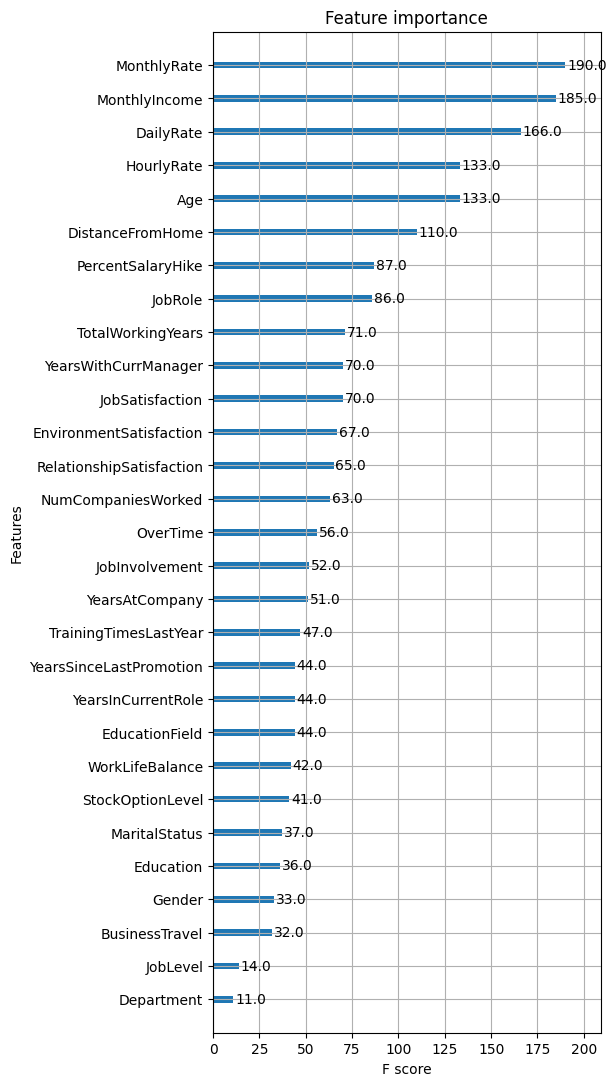

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
plt.rcParams['figure.figsize'] = (5, 13)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [ ]:
# ...........................Coefficient Magnitude (Statistical Method):............................

from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(xtrain, ytrain)

# Access coefficient values
coefficients = model.coef_[0]
feature_names = xtrain.columns  # Assuming you have named features

# Create a DataFrame to display feature names and their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance.sort_values(by = 'Coefficient', ascending = False)

,Feature,Coefficient
18,OverTime,0.833561
3,Department,0.732918
28,YearsSinceLastPromotion,0.534015
14,MaritalStatus,0.475210
26,YearsAtCompany,0.416368
17,NumCompaniesWorked,0.402453
4,DistanceFromHome,0.374260
8,Gender,0.343718
20,PerformanceRating,0.166940
6,EducationField,0.085841


In [123]:
sel_cols = ['MonthlyIncome', 'TotalWorkingYears', 'OverTime', 'MonthlyRate', 'YearsInCurrentRole', 'Age', 'JobSatisfaction', 'Attrition']
new_data = data[sel_cols]
new_data.head(3)

,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition
0,2.769461,1.506840,-0.628241,-1.103401,3.802074,1.541369,0.246200,0
1,2.867626,2.921061,-0.628241,-1.213586,3.802074,1.650871,0.246200,0
2,2.704655,1.378275,-0.628241,-1.318289,3.525976,0.555852,1.153254,0


In [124]:
#----------------------------------Under Sampling-------------------------------
temdf = new_data.loc[new_data.Attrition== 0] #------------------------------------------------ locate class of 0
temdf = temdf.sample(600)
data_ = pd.concat([temdf, new_data.loc[new_data.Attrition== 1]], axis = 0) #------------------- concat the sample of class of 0 and the class of 1
data_.reset_index(drop = True, inplace = True) #--------------------------------- rest the index
data_

,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition
0,-0.292569,-0.164511,1.591746,0.236797,1.041095,-0.758170,1.153254,0
1,2.748001,1.378275,-0.628241,-1.175499,0.764998,0.336849,0.246200,0
2,-0.364386,-0.935905,1.591746,1.556476,-0.615492,-0.210661,-0.660853,0
3,-0.884109,-1.064470,-0.628241,1.001199,-0.615492,-0.429664,1.153254,0
4,-0.394133,-0.935905,-0.628241,1.653028,-1.167687,-0.539166,1.153254,0
...,...,...,...,...,...,...,...,...
832,-0.856487,-1.321601,1.591746,1.655417,-1.167687,-1.634185,-0.660853,1
833,-1.149920,-1.321601,-0.628241,-0.515940,-1.167687,-0.867672,-1.567907,1
834,0.712031,-0.678774,1.591746,1.270335,-1.167687,-0.977174,0.246200,1
835,-0.773408,-1.321601,-0.628241,0.736701,-1.167687,-1.086676,-0.660853,1


,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition
0,-1.149920,-1.321601,-0.628241,-0.515940,-1.167687,-0.867672,-1.567907,1
1,-0.736224,-0.807339,-0.628241,1.080605,-1.167687,-0.101159,1.153254,0
2,0.044423,-0.421642,-0.628241,-0.749800,0.764998,-0.320163,0.246200,0
3,0.319795,-0.293077,-0.628241,1.191632,-0.615492,-0.101159,-1.567907,0
4,-0.860099,-0.293077,-0.628241,-0.511302,0.764998,0.665354,1.153254,0


<Axes: xlabel='Attrition', ylabel='count'>

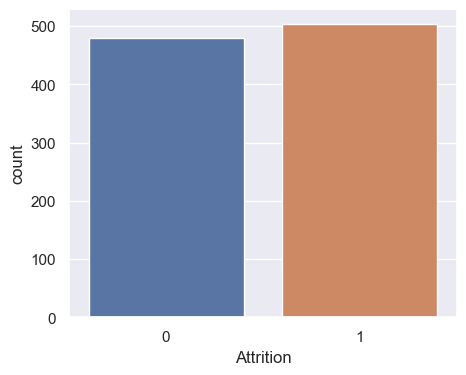

In [131]:
 # oversampling the train dataset using ADASYN
from imblearn.over_sampling import ADASYN
x = data_.drop('Attrition', axis = 1)
y = data_.Attrition

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, stratify = y)

ada = ADASYN(random_state=1)
xtrain_ada, ytrain_ada = ada.fit_resample(xtrain, ytrain)

final_train = pd.concat([xtrain_ada, ytrain_ada], axis = 1)
display(final_train.head())

sns.set(style = 'darkgrid')
plt.figure(figsize = (5,4))
sns.countplot(x = ytrain_ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       504

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



<Axes: >

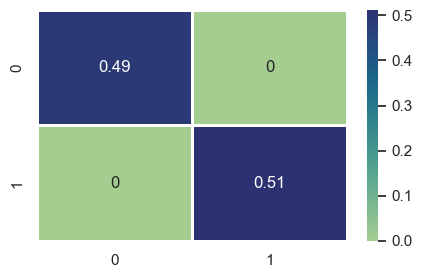

In [133]:
# ------------- MODELLING ------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

rf_model = RandomForestClassifier()
# logistic_model = LogisticRegression()
rf_model.fit(xtrain_ada, ytrain_ada)
train_pred = rf_model.predict(xtrain_ada)
print(classification_report(train_pred, ytrain_ada))


revealer = confusion_matrix(train_pred, ytrain_ada)
plt.figure(figsize = (5,3))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       460
           1       0.72      0.69      0.70       524

    accuracy                           0.69       984
   macro avg       0.69      0.69      0.69       984
weighted avg       0.69      0.69      0.69       984



<Axes: >

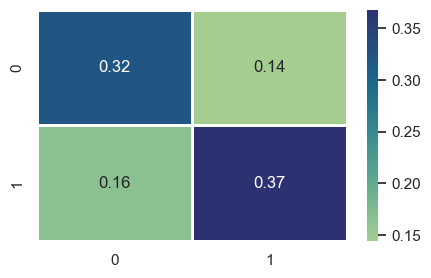

In [134]:
# ------------- MODELLING ------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# rf_model = RandomForestClassifier()
logistic_model = LogisticRegression()
logistic_model.fit(xtrain_ada, ytrain_ada)
train_pred = logistic_model.predict(xtrain_ada)
print(classification_report(train_pred, ytrain_ada))


revealer = confusion_matrix(train_pred, ytrain_ada)
plt.figure(figsize = (5,3))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)

In [194]:
import joblib
joblib.dump(logistic_model, 'Employee_attrition.pkl')

['Employee_attrition.pkl']

In [159]:
# Create the full test data by concating the xtest and ytest
test_data = pd.concat([xtest, ytest], axis = 1)
test_data.head()

,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition
593,-0.155732,-0.164511,-0.628241,-1.254342,0.764998,0.884358,1.153254,0
295,-0.560079,-1.193036,1.591746,-0.012804,-0.615492,-0.977174,1.153254,0
631,-0.791468,-0.164511,1.591746,0.479511,0.764998,0.446350,1.153254,1
28,0.574769,0.606882,-0.628241,-1.077682,-0.615492,1.431867,1.153254,0
725,0.365690,-0.678774,1.591746,0.572268,-0.615492,-0.429664,-1.567907,1


In [162]:
# test the model accuracy and save the models prediction to a column in the test dataframe
predictors = logistic_model.predict(xtest)
test_data.reset_index(inplace= True, drop = True)
test_data['predicted'] = pd.Series(predictors)
test_data

,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition,predicted
0,-0.155732,-0.164511,-0.628241,-1.254342,0.764998,0.884358,1.153254,0,0
1,-0.560079,-1.193036,1.591746,-0.012804,-0.615492,-0.977174,1.153254,0,1
2,-0.791468,-0.164511,1.591746,0.479511,0.764998,0.446350,1.153254,1,1
3,0.574769,0.606882,-0.628241,-1.077682,-0.615492,1.431867,1.153254,0,0
4,0.365690,-0.678774,1.591746,0.572268,-0.615492,-0.429664,-1.567907,1,1
...,...,...,...,...,...,...,...,...,...
163,-0.931067,-1.321601,1.591746,-0.613616,-1.167687,-1.962690,-0.660853,1,1
164,0.241390,-0.164511,-0.628241,1.435190,-0.063296,-0.867672,1.153254,1,0
165,-0.586426,-0.807339,1.591746,-0.595768,-0.615492,-0.210661,-0.660853,1,1
166,-0.936379,-0.550208,-0.628241,1.695331,-0.063296,-1.305679,0.246200,0,0


In [170]:
# test the Logistic Model acuracy on the class of ones 
ones = test_data[test_data.Attrition == 1]
ones.reset_index(inplace = True, drop = True)
ones['predicted_ones'] = pd.Series(logistic_model.predict(ones.drop(['Attrition', 'predicted'], axis = 1)))
ones

,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition,predicted,predicted_ones
0,-0.791468,-0.164511,1.591746,0.479511,0.764998,0.446350,1.153254,1,1,1
1,0.365690,-0.678774,1.591746,0.572268,-0.615492,-0.429664,-1.567907,1,1,1
2,-0.091139,-0.293077,1.591746,1.204983,0.764998,-0.320163,0.246200,1,1,1
3,-0.446828,-0.678774,-0.628241,0.122116,-0.615492,-1.305679,-1.567907,1,1,1
4,1.421709,1.378275,1.591746,0.387597,-1.167687,0.336849,-0.660853,1,1,1
5,-0.377135,-0.807339,1.591746,0.412895,-1.167687,1.431867,0.246200,1,1,1
6,-0.944453,-0.550208,-0.628241,0.765090,-0.615492,-0.867672,0.246200,1,0,0
7,-0.554342,-0.935905,-0.628241,-0.728579,-0.615492,-1.634185,0.246200,1,1,1
8,-0.672268,-0.164511,1.591746,0.417673,0.764998,-0.867672,0.246200,1,1,1
9,-0.949765,-1.321601,-0.628241,0.022050,-1.167687,-0.758170,-1.567907,1,1,1


              precision    recall  f1-score   support

           0       0.70      0.87      0.77        97
           1       0.73      0.49      0.59        71

    accuracy                           0.71       168
   macro avg       0.71      0.68      0.68       168
weighted avg       0.71      0.71      0.70       168



<Axes: >

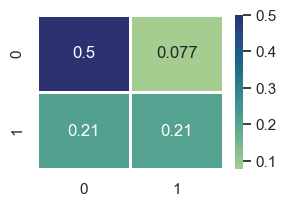

In [187]:
# Since it performs well on the train set, we go ahead to test the model on new dataset

test_pred = logistic_model.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)

<Axes: xlabel='Attrition', ylabel='count'>

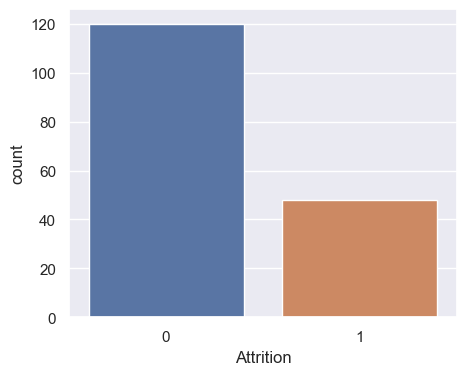

In [188]:
# Check the distribution of te Test Data 
plt.figure(figsize = (5,4))
sns.countplot(x = ytest)

In [ ]:
# ...........................Tree Diagram........................

# from sklearn import tree
# from IPython.display import Image as PImage
# from subprocess import check_call
# from PIL import Image, ImageDraw, ImageFont
# import re

# decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
# decision_tree.fit(xtrain, ytrain)

# # Predicting results for test dataset
# test_pred = decision_tree.predict(xtest)

# # Export our trained model as a .dot file
# with open("tree1.dot", 'w') as f:
#      f = tree.export_graphviz(decision_tree,
#                               out_file=f,
#                               max_depth = 4,
#                               impurity = False,
#                               feature_names = x.columns.values,
#                               class_names = ['No', 'Yes'],
#                               rounded = True,
#                               filled= True )

# #Convert .dot to .png to allow display in web notebook
# check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# # Annotating chart with PIL
# img = Image.open("tree1.png")
# draw = ImageDraw.Draw(img)
# img.save('sample-out.png')
# PImage("sample-out.png", height=2000, width=1900)

In [181]:
# ..........................How is attrition dependent on Age?..........................

age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Attrition=0<br>Age=%{x}<br>Counts=%{y}<extra></extra>',
              'legendgroup': '0',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                          54, 55, 56, 57, 58, 59, 60], dtype=int64),
              'xaxis': 'x',
              'y': array([ 4,  3,  5,  7, 11, 10, 19, 20, 27, 45, 34, 50, 51, 51, 50, 46, 68, 68,
                          63, 44, 56, 36, 52, 34, 44, 30, 27, 39, 29, 21, 17, 22, 25, 17, 15, 17,
                          18, 19, 11,  4,  9, 10,  5], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'Attrition=1<br>Age=%{x}<br>Counts=%{y}<extra></extra>',
              'legendgroup': '1',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                          55, 56, 58], dtype=int64),
              'xaxis': 'x',
              'y': array([ 4,  6,  6,  6,  5,  4,  7,  6, 12,  3, 14, 18,  9, 18, 11, 12,  9, 10,
                           6,  6,  2,  6,  5,  6,  2,  2,  6,  2,  4,  3,  2,  2,  5,  2,  3,  2,
                           3,  3,  5], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'Attrition'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Agewise Counts of People in an Organization'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Age'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Counts'}}}
})

In [193]:
data_

,MonthlyIncome,TotalWorkingYears,OverTime,MonthlyRate,YearsInCurrentRole,Age,JobSatisfaction,Attrition
0,-0.292569,-0.164511,1.591746,0.236797,1.041095,-0.758170,1.153254,0
1,2.748001,1.378275,-0.628241,-1.175499,0.764998,0.336849,0.246200,0
2,-0.364386,-0.935905,1.591746,1.556476,-0.615492,-0.210661,-0.660853,0
3,-0.884109,-1.064470,-0.628241,1.001199,-0.615492,-0.429664,1.153254,0
4,-0.394133,-0.935905,-0.628241,1.653028,-1.167687,-0.539166,1.153254,0
...,...,...,...,...,...,...,...,...
832,-0.856487,-1.321601,1.591746,1.655417,-1.167687,-1.634185,-0.660853,1
833,-1.149920,-1.321601,-0.628241,-0.515940,-1.167687,-0.867672,-1.567907,1
834,0.712031,-0.678774,1.591746,1.270335,-1.167687,-0.977174,0.246200,1
835,-0.773408,-1.321601,-0.628241,0.736701,-1.167687,-1.086676,-0.660853,1
